In [6]:
import numpy as np
import pandas as pd

In [7]:
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=os.path.join('D:/Anaconda/Lib/site-packages/matplotlib/mpl-data/fonts/ttf/msj.ttf'))

In [8]:
import matplotlib    
print(matplotlib.matplotlib_fname())

D:\Anaconda\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [9]:
data=pd.read_csv('2019opendog.csv')

In [10]:
data.head()

,個股代號,公司簡稱,事件日,TCRI(年/月),事件強度,大事件類別,小事件類別,事件內容
0,1218,泰山,20190101,6(2018/09),0,M_經營層,MT06_高管異動,發言人林俐婉內部調動，由江巍峰接任。。
1,1503,士電,20190101,4(2018/09),0,M_經營層,MT06_高管異動,內部稽核主管林志強內部調動，由莊文清接任。。
2,1504,東元,20190101,4(2018/09),0,M_經營層,MT06_高管異動,會計主管藍俊雄內部調動，由林鴻名接任。。
3,1709,和益,20190101,5(2018/09),0,M_經營層,MT06_高管異動,內部稽核主管游本詮內部調動，由曾筱茜接任。。
4,1721,三晃,20190101,7(2018/09),0,M_經營層,MT06_高管異動,財務經理洪廷宜內部調動，由王婷渝接任。。


In [11]:
data.columns

Index(['個股代號', '公司簡稱', '事件日', 'TCRI(年/月)', '事件強度', '大事件類別', '小事件類別', '事件內容'], dtype='object')

In [12]:
data.dtypes

個股代號          int64
公司簡稱         object
事件日           int64
TCRI(年/月)    object
事件強度          int64
大事件類別        object
小事件類別        object
事件內容         object
dtype: object

刪除不需要的資料

In [13]:
data.isnull().sum()

個股代號           0
公司簡稱         928
事件日            0
TCRI(年/月)      0
事件強度           0
大事件類別          0
小事件類別          0
事件內容           0
dtype: int64

In [14]:
nullcompany=data[data.iloc[:,1].isnull()==True].iloc[:,0].unique()
nullcompany.sort()
nullcompany

array([  1262,   1566,   1787,   1814,   1819,   2475,   3431,   3452,
         3519,   3562,   3579,   4135,   4159,   4180,   4193,   4415,
         4427,   5256,   5259,   5317,   6490,   6553,   6562,   6656,
         8041,   8127,   8479,   8496,   8913,   9157, 910708, 911619],
      dtype=int64)

股票1262: 綠悅 於2019年10月下市
股票1814: 東光訊 於2019年10月下市
股票3452: 益通光能 於2020年1月下市
股票3562: 頂晶科 於2020年2月下市
股票4135: 天賜爾 於2019年10月下市
股票4193: 喬本生醫 於2019年10月下市
股票4415: 台原藥 於2019年12月下市
股票5256: 銳捷 於2020年1月下市
股票5259: 益智博國際  於2019年11下市
股票6553: 豐華 於2019年12月下市
股票6562: 聯亞藥 於2019年11月下市
股票8127: 利汎 於2019年10月下市
股票8479: 台灣藝術 於2019年10月下市
股票8913: 全銓租賃 於2020年1月下市
股票9157: 陽光能源 於2019年11月下市

In [15]:
df=data.dropna(inplace=False)
df.isna().sum()

個股代號         0
公司簡稱         0
事件日          0
TCRI(年/月)    0
事件強度         0
大事件類別        0
小事件類別        0
事件內容         0
dtype: int64

In [16]:
len(df)

22775

In [17]:
df.iloc[6779,]

個股代號                                                      2317
公司簡稱                                            鴻海            
事件日                                                   20190521
TCRI(年/月)                                 2(2018/09)          
事件強度                                                         0
大事件類別                                                   I_產業前景
小事件類別                                          IF02_投資/併購/組織策略
事件內容         鴻海代子公司鴻富成科技(天津)有限公司公告取得天津愛奇鴻海海河智慧出行股權投資基金合夥企業(...
Name: 7228, dtype: object

In [18]:
TCRI=[]
for i in range(0,len(df)):
    TCRI.append(df.iloc[i,3][0])

In [19]:
# month=[]
# for i in range(0,len(df)):
#     month.append(df.iloc[i,3][7:9])

In [20]:
df=df.drop(columns=['TCRI(年/月)'])
df.head()

,個股代號,公司簡稱,事件日,事件強度,大事件類別,小事件類別,事件內容
0,1218,泰山,20190101,0,M_經營層,MT06_高管異動,發言人林俐婉內部調動，由江巍峰接任。。
1,1503,士電,20190101,0,M_經營層,MT06_高管異動,內部稽核主管林志強內部調動，由莊文清接任。。
2,1504,東元,20190101,0,M_經營層,MT06_高管異動,會計主管藍俊雄內部調動，由林鴻名接任。。
3,1709,和益,20190101,0,M_經營層,MT06_高管異動,內部稽核主管游本詮內部調動，由曾筱茜接任。。
4,1721,三晃,20190101,0,M_經營層,MT06_高管異動,財務經理洪廷宜內部調動，由王婷渝接任。。


In [21]:
df.insert(3, 'TCRI', TCRI)
df

,個股代號,公司簡稱,事件日,TCRI,事件強度,大事件類別,小事件類別,事件內容
0,1218,泰山,20190101,6,0,M_經營層,MT06_高管異動,發言人林俐婉內部調動，由江巍峰接任。。
1,1503,士電,20190101,4,0,M_經營層,MT06_高管異動,內部稽核主管林志強內部調動，由莊文清接任。。
2,1504,東元,20190101,4,0,M_經營層,MT06_高管異動,會計主管藍俊雄內部調動，由林鴻名接任。。
3,1709,和益,20190101,5,0,M_經營層,MT06_高管異動,內部稽核主管游本詮內部調動，由曾筱茜接任。。
4,1721,三晃,20190101,7,0,M_經營層,MT06_高管異動,財務經理洪廷宜內部調動，由王婷渝接任。。
5,1817,凱撒衛,20190101,6,0,M_經營層,MT06_高管異動,研發主管吳政峰內部調動，由朱清立接任。。
6,2064,晉椿,20190101,7,-1,M_經營層,MT06_高管異動,總經理高進義離職，由陳譽接任。。發言人高進義離職，由陳譽接任。。
7,2207,和泰車,20190101,4,0,M_經營層,MT02_董監異動,改派1董。董事大野勝仁(豐田自動車代表)卸任。董事長沼一生(豐田自動車代表)新任。
8,2330,台積電,20190101,1,-1,M_經營層,MT02_董監異動,辭任1董。獨立董事湯馬斯?延吉布斯卸任。
9,2357,華碩,20190101,2,0,M_經營層,MT06_高管異動,總經理沈振來內部調動，由胡書賓接任。。


各欄位的EDA

個股代號=公司簡稱，所以只做公司簡稱統計圖

In [22]:
# numbercompany=[]
# for i in range(0,len(df.iloc[:,0])):
#     numbercompany.appends(str(df.iloc[i,0])[:2])

In [23]:
# a=pd.DataFrame(numbercompany)
# a.iloc[:,0].unique()

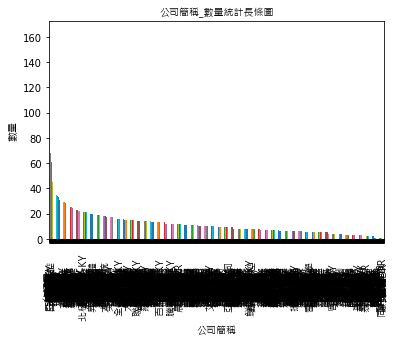

In [24]:
plt.xticks(fontproperties=myfont)
plt.title("公司簡稱_數量統計長條圖",fontproperties=myfont)
plt.xlabel("公司簡稱",fontproperties=myfont)
plt.ylabel("數量",fontproperties=myfont)
df.iloc[:,1].value_counts().plot.bar()

In [48]:
df.iloc[:,1].value_counts()

台積電               164
大同                126
鴻海                105
誠美材                81
大飲                 73
鈞泰                 72
昇華                 71
中鋼                 68
新零售                67
中華電                66
亞獅康-KY             65
長榮航                64
天剛                 63
永利聯合               61
日月光投控              53
松崗                 50
氣立                 50
德宏                 49
天蔥                 45
達能                 45
台灣大                44
雙美                 44
美時                 43
台塑                 42
燦星旅                42
中信金                41
大略-KY              41
富邦金                41
國泰金                40
豐興                 40
                 ... 
廣宇                  1
勁豐                  1
鎰勝                  1
雙邦                  1
精聯                  1
鑫永銓                 1
志豐                  1
宜新實業                1
加百裕                 1
安心                  1
大甲                  1
冠亞                  1
新洲                  1
逸昌                  1
國眾        

事件強度

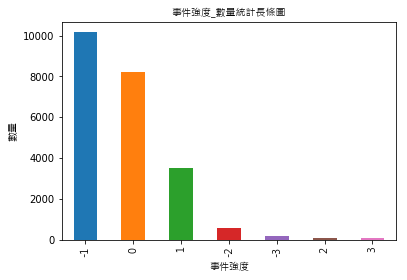

In [25]:
plt.xticks(fontproperties=myfont)
plt.title("事件強度_數量統計長條圖",fontproperties=myfont)
plt.xlabel("事件強度",fontproperties=myfont)
plt.ylabel("數量",fontproperties=myfont)
df.iloc[:,4].value_counts().plot.bar()

大事件類別

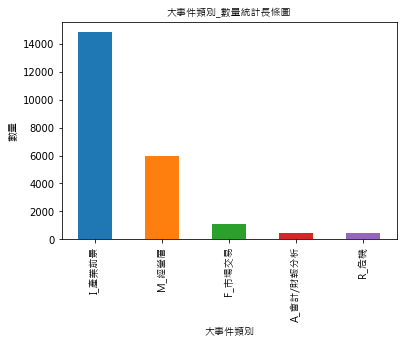

In [26]:
plt.xticks(fontproperties=myfont)
plt.title("大事件類別_數量統計長條圖",fontproperties=myfont)
plt.xlabel("大事件類別",fontproperties=myfont)
plt.ylabel("數量",fontproperties=myfont)
df.iloc[:,5].value_counts().plot.bar()

In [27]:
data.iloc[:,1].values

array(['泰山            ', '士電            ', '東元            ', ...,
       '昇陽半導體      ', '雷虎            ', '商億-KY         '], dtype=object)

In [28]:
smallcount=[]
for i in range(1,len(df.iloc[:,6].value_counts())):
    smallcount.append(df.iloc[:,6].value_counts()[i])

In [29]:
df.iloc[:,5].unique()

array(['M_經營層', 'F_市場交易', 'I_產業前景', 'R_危機', 'A_會計/財報分析'], dtype=object)

TCRI

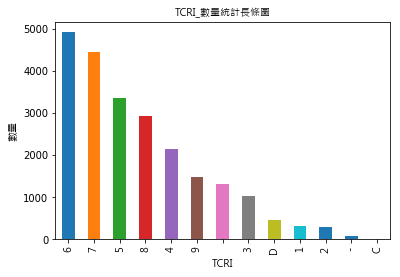

In [33]:
plt.xticks(fontproperties=myfont)
plt.title("TCRI_數量統計長條圖",fontproperties=myfont)
plt.xlabel("TCRI",fontproperties=myfont)
plt.ylabel("數量",fontproperties=myfont)
df.iloc[:,3].value_counts().plot.bar()

In [37]:
import jieba
import jieba.analyse
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.font_manager import FontProperties
from wordcloud import WordCloud
myfont = FontProperties(fname=os.path.join('D:/Anaconda/Lib/site-packages/matplotlib/mpl-data/fonts/ttf/msj.ttf'))

In [38]:
def cut(text):
    tags = jieba.analyse.extract_tags(text)
    tags = " ".join(tags)
    return tags
old=str(" ")
for i in range(0,len(df)): 
    new=cut(df.iloc[i,7])
    old=old+str(new)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.cache
Loading model cost 0.695 seconds.
Prefix dict has been built succesfully.


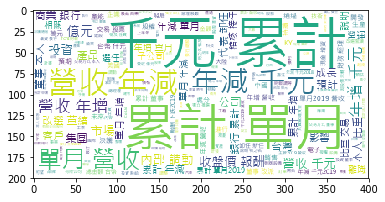

In [39]:
my_wordcloud = WordCloud(background_color='white',font_path='D:/Anaconda/Lib/site-packages/matplotlib/mpl-data/fonts/ttf/msj.ttf').generate(old)
plt.imshow(my_wordcloud)
plt.axis('on')
plt.show()